# 1. Dimension Reduction and Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data
이번 실습에서 사용할 데이터는 손글씨 데이터  
데이터는 `sklearn.datasets`의 `load_digits`를 이용해 다운로드

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
data, target = digits["data"], digits["target"]
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

### 1.2 Data Normalization
데이터의 크기에 영향을 받는 PCA를 위해서 데이터를 정규화

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### 1.3 Visualization
TSNE를 이용해 시각화 데이터를 생성

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_latent = tsne.fit_transform(scaled_data)

In [6]:
def visualize_latent_space_with_label(latent, pred):
    for label in np.unique(pred):
        index = pred == label
        component_1 = latent[index, 0]
        component_2 = latent[index, 1]
        plt.scatter(component_1, component_2, c=f"C{label}", label=label)
    plt.legend()

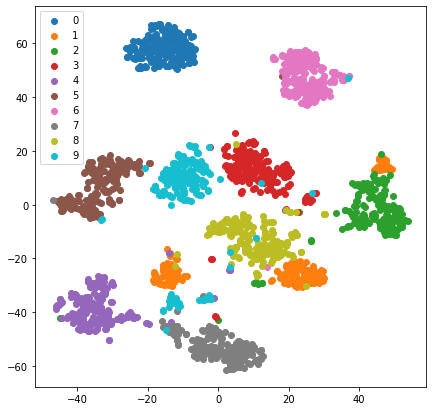

In [7]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, target)

# 2. Clustering
우선 데이터에 다른 처리 없이 Kmeans로 군집화   
k means 의 k는 정답을 알고 있는 상태니 10을 주어서 실제로 잘 군집이 되는지 확인

### 2.1 Learning

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10)

### 2.2 Predict

In [9]:
pred = kmeans.predict(scaled_data)

### 2.3 Visualization

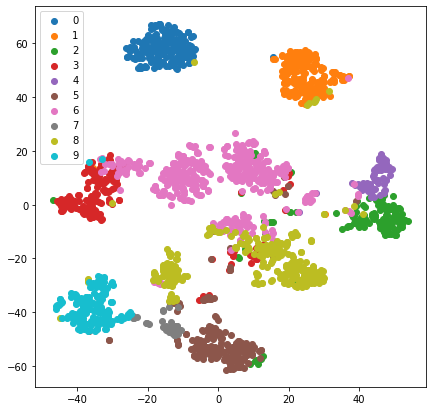

In [10]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pred)

# 3. PCA & Clustering
차원 차원을 축소한 후 군집화 진행

### 3.1 Create PCA Data

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
pca.fit(scaled_data)

PCA(n_components=12)

In [12]:
pca_data = pca.transform(scaled_data)

### 3.2 K Means Learning

In [13]:
pca_kmeans = KMeans(n_clusters=10)

pca_kmeans.fit(pca_data)

KMeans(n_clusters=10)

### 3.3 Predict

In [14]:
pca_pred = pca_kmeans.predict(pca_data)

### 3.4 Visualization

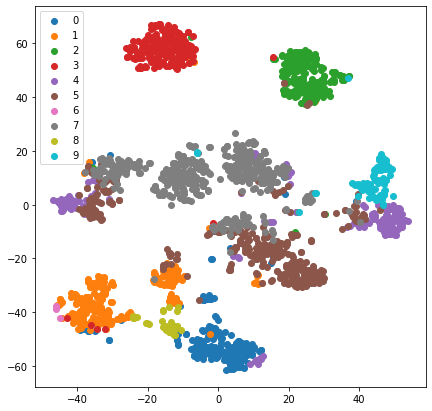

In [15]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pca_pred)

# 4. Summary

Text(0.5, 1.0, 'PCA Clustering')

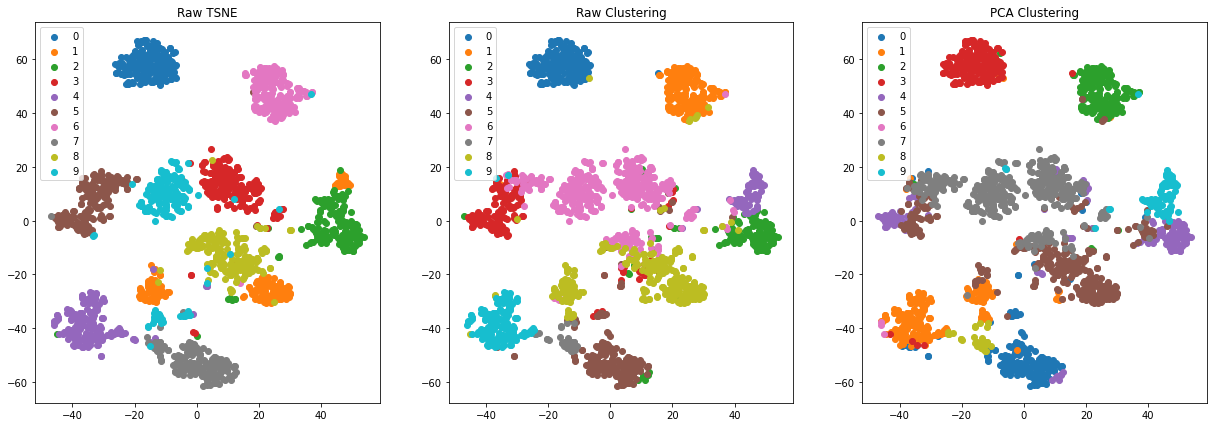

In [16]:
plt.figure(figsize=(21, 7))

plt.subplot(131)
visualize_latent_space_with_label(tsne_latent, target)
plt.title("Raw TSNE")

plt.subplot(132)
visualize_latent_space_with_label(tsne_latent, pred)
plt.title("Raw Clustering")

plt.subplot(133)
visualize_latent_space_with_label(tsne_latent, pca_pred)
plt.title("PCA Clustering")